## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## 2. Import dataset

In [39]:
tracks = pd.read_csv('tracks.csv')

In [40]:
tracks.head()

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Intro,0.000,0.385,3,-18.509,0,0.0000,0.23800,0.97800,0.0000,0.000,0.000,6453
1,What Up Gangsta,0.680,0.767,11,-2.387,0,0.0397,0.00213,0.00000,0.0996,0.344,82.518,179467
2,Patiently Waiting,0.538,0.675,0,-2.300,1,0.3350,0.24500,0.00000,0.3620,0.519,78.985,288880
3,Many Men (Wish Death),0.653,0.826,6,-2.930,0,0.3540,0.01530,0.00146,0.1310,0.416,108.520,256227
4,In Da Club,0.902,0.720,6,-2.776,0,0.3470,0.26000,0.00000,0.0749,0.805,90.059,193467


## 3. Brief EDA

In [14]:
tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000,10638.000000
mean,0.665112,0.681838,5.405997,-7.031257,0.573416,0.266928,0.167779,0.005547,0.258691,0.544050,112.661300,230138.718838
std,0.148991,0.170889,3.641904,3.430698,0.494604,0.177510,0.211108,0.060828,0.194911,0.215611,33.048707,78232.391646
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000
25%,0.574000,0.578000,1.000000,-8.154250,0.000000,0.132000,0.022500,0.000000,0.109000,0.386000,87.577500,202520.000000
50%,0.681000,0.706000,6.000000,-6.353000,1.000000,0.259000,0.085500,0.000000,0.200000,0.558000,99.104500,238173.000000
75%,0.775750,0.813000,8.000000,-4.912000,1.000000,0.350000,0.223000,0.000000,0.345000,0.710000,140.008000,272249.750000
max,0.967000,0.994000,11.000000,0.496000,1.000000,0.961000,0.993000,0.991000,0.986000,0.979000,220.333000,992160.000000


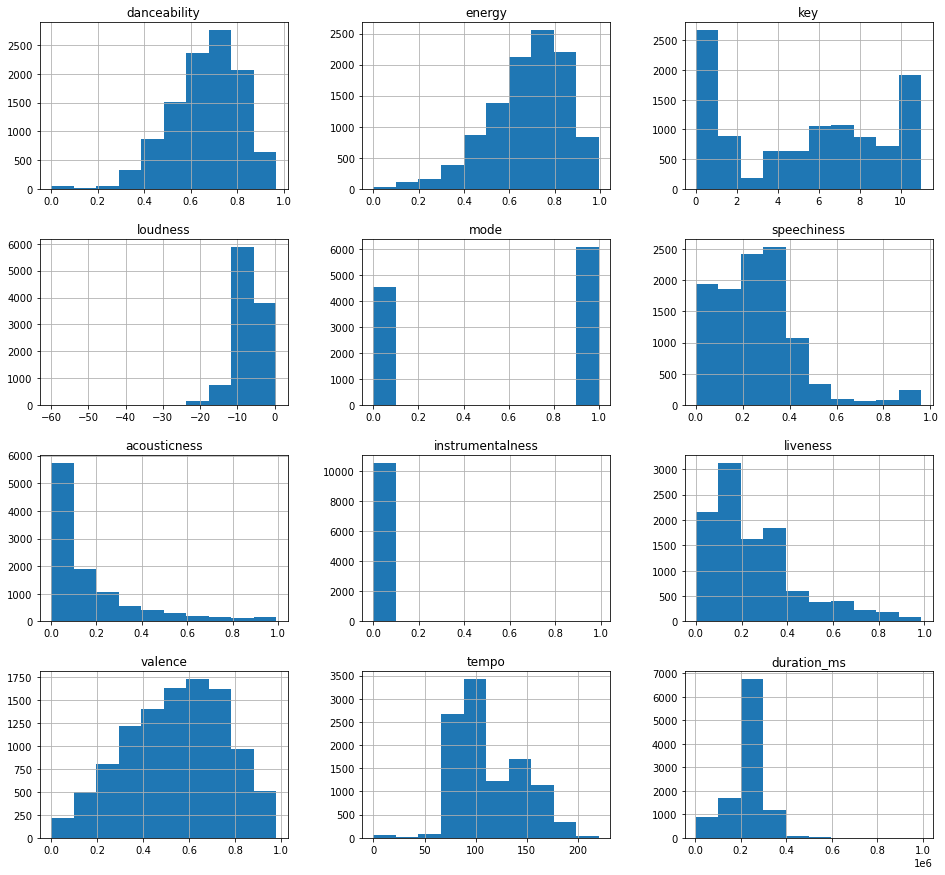

In [15]:
tracks.hist(figsize = (16, 15));

## 4. Scale and remove categorical variables

In [16]:
# split out the categorical variables (don't want a million rows)

numeric = tracks.select_dtypes(exclude = 'object')

In [17]:
numeric.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.000,0.385,3,-18.509,0,0.0000,0.23800,0.97800,0.0000,0.000,0.000,6453
1,0.680,0.767,11,-2.387,0,0.0397,0.00213,0.00000,0.0996,0.344,82.518,179467
2,0.538,0.675,0,-2.300,1,0.3350,0.24500,0.00000,0.3620,0.519,78.985,288880
3,0.653,0.826,6,-2.930,0,0.3540,0.01530,0.00146,0.1310,0.416,108.520,256227
4,0.902,0.720,6,-2.776,0,0.3470,0.26000,0.00000,0.0749,0.805,90.059,193467


In [18]:
# scale the numeric variables (since the scales were quite different from some audio features)

scaler = StandardScaler().fit(numeric)
scaled = scaler.fit_transform(numeric)

In [19]:
numeric_scaled = pd.DataFrame(scaled)

In [20]:
numeric_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-4.464335,-1.737109,-0.660674,-3.345758,-1.159398,-1.503804,0.332648,15.987575,-1.327290,-2.523412,-3.409108,-2.859381
1,0.099928,0.498370,1.536083,1.353799,-1.159398,-1.280144,-0.784700,-0.091195,-0.816262,-0.927872,-0.912130,-0.647738
2,-0.853198,-0.040017,-1.484457,1.379159,0.862516,0.383499,0.365808,-0.091195,0.530060,-0.116188,-1.019038,0.750892
3,-0.081300,0.843641,0.163110,1.195515,-1.159398,0.490540,-0.722312,-0.067192,-0.655155,-0.593922,-0.125315,0.333487
4,1.590025,0.223324,0.163110,1.240406,-1.159398,0.451104,0.436865,-0.091195,-0.942993,1.210337,-0.683941,-0.468776


## 5. Run the model

In [21]:
# fit the df into the model

kmeans = KMeans(n_clusters = 39, random_state=40).fit(numeric_scaled)

In [22]:
kmeans.cluster_centers_

array([[-9.87634430e-01, -2.06502577e+00,  2.10635851e-01,
        -1.98430031e+00,  1.62622795e-01, -2.39231894e-02,
         2.76343627e+00,  5.82351313e-02, -3.54855483e-01,
        -7.17690714e-01, -1.04340765e-01, -2.00590516e+00],
       [ 7.11167683e-01, -8.56738370e-01,  1.03373607e+00,
        -5.39647827e-01, -1.15939833e+00, -3.59597785e-01,
        -2.33740815e-01, -6.99218419e-02, -4.23445345e-01,
        -2.01176031e-01, -3.70164654e-01,  1.94430923e-01],
       [ 5.49940064e-01, -1.51823804e-01, -8.93316310e-01,
         3.53608611e-02,  8.00735608e-01,  4.05123484e-02,
        -3.99036950e-01, -8.11452536e-02, -3.10901408e-01,
         6.88706825e-01,  1.41380054e+00,  1.41745985e-01],
       [-3.28821698e+00, -2.75776977e+00, -7.52205231e-01,
        -3.65257714e+00,  1.88544778e-01, -1.37222459e+00,
         1.05003468e+00,  1.47782881e+01, -5.86630616e-01,
        -2.34695462e+00, -1.38310013e+00, -2.49414877e+00],
       [-2.57142953e-01, -2.98801790e-01, -3.8121910

In [23]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(numeric_scaled)

In [24]:
pd.Series(clusters).value_counts().sort_index()

0     104
1     340
2     360
3       9
4     339
5     380
6     309
7     273
8     438
9     476
10    349
11    378
12     20
13    137
14    366
15    204
16    292
17     47
18    324
19    185
20    119
21    173
22    234
23    252
24    275
25    493
26    479
27    523
28     84
29     49
30    261
31    415
32     38
33    163
34    539
35    222
36    162
37    355
38    472
dtype: int64

In [25]:
print(kmeans.inertia_)

46828.16988305211


In [26]:
K = range(2, 40)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters= k,
                random_state = 40)
    kmeans.fit(numeric_scaled)
    inertia.append(kmeans.inertia_)


print(inertia)

[110672.29352002434, 100180.43587622848, 94622.7986227108, 85146.26167660915, 80902.80965848522, 77027.69163994968, 73965.7060118246, 71376.45367969203, 69336.48683815387, 67538.74337887095, 65836.60562411777, 64196.61854496776, 62844.445902011445, 61651.27452082319, 60617.276127690464, 59586.984088566234, 58252.81780855362, 57447.78727165961, 56532.78908193574, 55959.72868480192, 55051.76174576859, 54331.01783444526, 53619.829680946736, 53134.33605856536, 52545.78277408647, 51956.92261576906, 51497.38182800235, 50749.500212605846, 50395.88254977586, 49950.253470345044, 49496.058780230895, 49125.766268265324, 48696.30855351925, 48345.8698403386, 47929.479838166226, 47698.52152718958, 47218.179171766, 46828.16988305211]


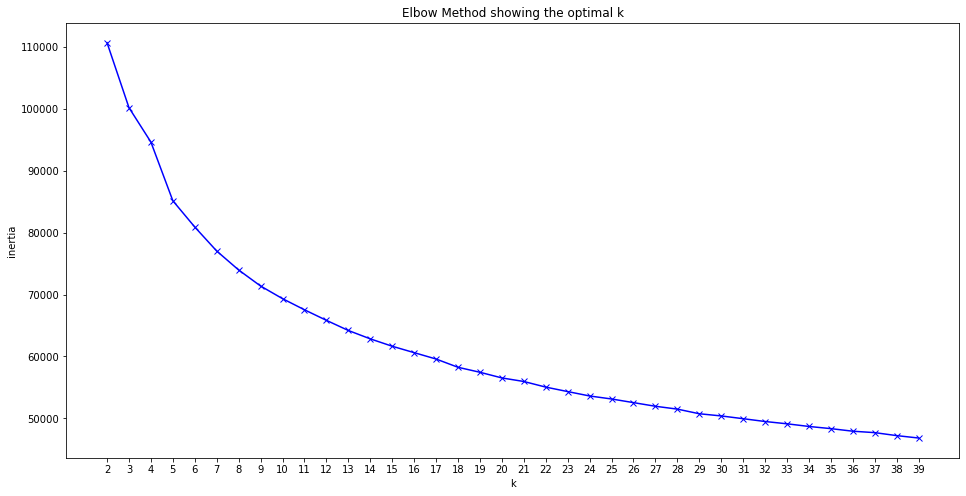

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k');

In [28]:
track_cluster = pd.DataFrame(tracks)
track_cluster['cluster'] = clusters
track_cluster.head()

,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,Intro,0.000,0.385,3,-18.509,0,0.0000,0.23800,0.97800,0.0000,0.000,0.000,6453,3
1,What Up Gangsta,0.680,0.767,11,-2.387,0,0.0397,0.00213,0.00000,0.0996,0.344,82.518,179467,11
2,Patiently Waiting,0.538,0.675,0,-2.300,1,0.3350,0.24500,0.00000,0.3620,0.519,78.985,288880,31
3,Many Men (Wish Death),0.653,0.826,6,-2.930,0,0.3540,0.01530,0.00146,0.1310,0.416,108.520,256227,11
4,In Da Club,0.902,0.720,6,-2.776,0,0.3470,0.26000,0.00000,0.0749,0.805,90.059,193467,27


In [29]:
track_cluster.to_csv('track_clusters.csv')

In [30]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass

In [31]:
client_id= getpass.getpass()
client_secret=getpass.getpass()

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

········
········


In [32]:
song_id = sp.search(q = 'butter', type = 'track', limit=1)['tracks']['items'][0]['uri']
song_check = sp.search(q = 'Butter', type = 'track', limit=1)['tracks']['items'][0]['name']
artist_check = sp.search(q = 'Butter', type = 'track', limit=1)['tracks']['items'][0]['artists'][0]['name']
features = pd.DataFrame(sp.audio_features(song_id)).drop(columns = ['type','id','uri','track_href','analysis_url', 'time_signature'])

In [33]:
features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0,0.0906,0.695,109.997,164442


In [34]:
artist_check

'BTS'

In [28]:
song_id = sp.search(q = 'butter', type = 'track', limit=1)['tracks']['items'][0]['uri']
song_check = sp.search(q = 'Butter', type = 'track', limit=1)['tracks']['items'][0]['name']
artist_check = sp.search(q = 'Butter', type = 'track', limit=1)['tracks']['items'][0]['artists'][0]['name']
features = pd.DataFrame(sp.audio_features(song_id)).drop(columns = ['type','id','uri','track_href','analysis_url', 'time_signature'])

#answer = input("Do you mean " + song_check  + " by " + artist_check + "?")

#if answer == 'yes':
 #   features = pd.DataFrame(sp.audio_features(song_id)).drop(columns = ['type','id','uri','track_href','analysis_url', 'time_signature'])
  #  features.head()
""" prediction = kmeans.predict(features)[0]
    suggestion = tracks[tracks.cluster == prediction].sample(1)
    suggestion = suggestion['name'].values[0]
    artist = sp.search(q = suggestion, type = 'track', limit=1)['tracks']['items'][0]['artists'][0]['name']
    print(" How about trying out " + suggestion + " by " + artist + "?")"""

' prediction = kmeans.predict(features)[0]\n    suggestion = tracks[tracks.cluster == prediction].sample(1)\n    suggestion = suggestion[\'name\'].values[0]\n    artist = sp.search(q = suggestion, type = \'track\', limit=1)[\'tracks\'][\'items\'][0][\'artists\'][0][\'name\']\n    print(" How about trying out " + suggestion + " by " + artist + "?")'

In [35]:
def clustering(df):
    # load and scale the dataframe with all track details
    numeric = df.select_dtypes(exclude = 'object')
    scaler = StandardScaler().fit(numeric)
    scaled = scaler.fit_transform(numeric)
    numeric_scaled = pd.DataFrame(scaled)
    
    # construct the K means prediction model and reference df
    kmeans = KMeans(n_clusters = 39, random_state=40).fit(numeric_scaled)
    clusters = kmeans.predict(numeric_scaled)
    track_cluster = pd.DataFrame(tracks)
    track_cluster['cluster'] = clusters

In [36]:
def suggest_song(song):
     # compare user input
    song_id = sp.search(q = 'butter', type = 'track', limit=1)['tracks']['items'][0]['uri']
    song_check = sp.search(q = 'Butter', type = 'track', limit=1)['tracks']['items'][0]['name']
    artist_check = sp.search(q = 'Butter', type = 'track', limit=1)['tracks']['items'][0]['artists'][0]['name']

    answer = input("Do you mean " + song_check  + " by " + artist_check + "?")

    if answer == 'yes':
        features = pd.DataFrame(sp.audio_features(song_id)).drop(columns = ['type','id','uri','track_href','analysis_url', 'time_signature'])
        prediction = kmeans.predict(features)[0]
        suggestion = tracks[tracks.cluster == prediction].sample(1)
        suggestion = suggestion['name'].values[0]
        artist = sp.search(q = suggestion, type = 'track', limit=1)['tracks']['items'][0]['artists'][0]['name']
        print(" How about trying out " + suggestion + " by " + artist + "?")

In [37]:
clustering(tracks)

In [38]:
suggest_song('butter')

Do you mean Butter by BTS?yes
 How about trying out In My Head by Bedroom?
